In [1]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#fater rcnn model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='FasterRCNN_ResNet50_FPN_Weights.DEFAULT')

In [12]:
with torch.inference_mode():
    model.eval()
    #load image
    img = cv2.imread("data/images/jungle.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #convert to tensor
    img = torchvision.transforms.functional.to_tensor(img)
    #predict
    pred = model([img])

In [16]:
pred

[{'boxes': tensor([[415.0001, 214.4220, 621.2716, 294.1444],
          [ 46.5354, 231.3532, 160.6542, 393.7061],
          [ 98.2297, 233.7971, 217.2829, 347.9595],
          [255.1213, 237.6105, 343.1147, 270.2929]]),
  'labels': tensor([25, 24, 24, 24]),
  'scores': tensor([0.9993, 0.9992, 0.9986, 0.9963])}]

In [14]:
predictions = pred[0]['boxes'].detach().numpy()
scores = pred[0]['scores'].detach().numpy()
labels = pred[0]['labels'].detach().numpy()

In [32]:
image = img.numpy()

In [34]:
for prediction,class_id,score in zip(predictions,labels,scores):
    if score > 0.5:
        x1,y1,x2,y2 = prediction.astype(int)
        cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2)
        #cv2.putText(img,str(class_id),(x1,y1),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

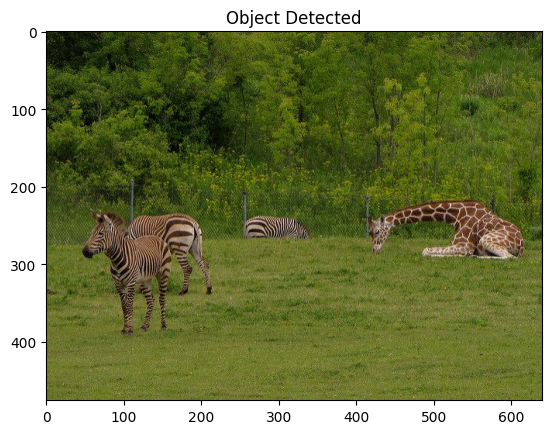

In [38]:
plt.title("Object Detected")
plt.imshow(image.transpose(1,2,0))